     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
6          8.77  2.00    Male     No   Sun  Dinner     2
7         26.88  3.12    Male     No   Sun  Dinner     4
8         15.04  1.96    Male     No   Sun  Dinner     2
9         14.78  3.23    Male     No   Sun  Dinner     2
10        10.27  1.71    Male     No   Sun  Dinner     2
11        35.26  5.00  Female     No   Sun  Dinner     4
12        15.42  1.57    Male     No   Sun  Dinner     2
13        18.43  3.00    Male     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
15        21.58  3.92    Male     No   Sun  Dinner     2
16        10.33  1.67  Female  

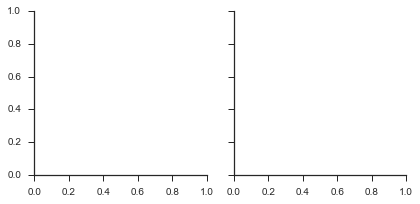

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set(style="ticks")
np.random.seed(sum(map(ord, "axis_grids")))
graph = nx.karate_club_graph()
tips = sns.load_dataset("tips")

print tips
# tips = graph.degree()
g = sns.FacetGrid(tips, col="sex")


In [5]:
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import numpy as np

import networkx as nx

from phoenix import phoenix, helpers

from pprint import PrettyPrinter as pp
pp = pp(2).pprint

cliques = nx.find_cliques(graph)
cliques = list(cliques)

In [35]:
print 'Summary: '
print ' |V|: ',len(graph.nodes())
print ' |g.cliques()|: ', len(cliques)
print ' largest clique',  max([len(x) for x in cliques])

# this the sampling frequency is twice the largest clique size
fs = 2*max([len(x) for x in cliques])
print fs

Summary: 
 |V|:  1589
 |g.cliques()|:  741
 largest clique 20
40


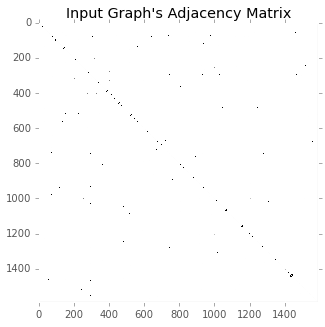

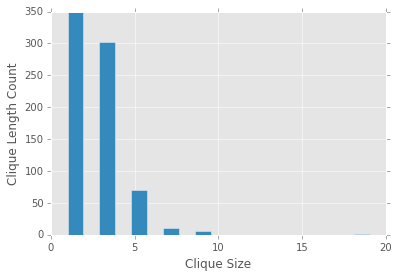

In [85]:
from matplotlib import pyplot, patches

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a networkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)


A = nx.adjacency_matrix(graph);
G = nx.from_scipy_sparse_matrix(A);
draw_adjacency_matrix(G); 
plt.title('Input Graph\'s Adjacency Matrix');

data = [len(x) for x in cliques]
count,bins = np.histogram(data)

fig, ax = plt.subplots()
rects1 = ax.bar(bins[:-1],count,width = np.mean(np.diff(bins))/2.)
ax.set_ylabel('Cliques Count')
ax.set_xlabel('Clique Size')

#Compression

In [87]:
one_to_two_model, two_to_one_intxn_model = phoenix.compress(cliques)

one_to_two_model = helpers.normalize_distributions(one_to_two_model)
two_to_one_intxn_model = helpers.normalize_distributions(two_to_one_intxn_model)


clq_numb_dist = helpers.clique_number_distribution(cliques)
clqs_x_clqs_dist = helpers.cliques_x_cliques_distribution(cliques)

clq_numb_dist = helpers.normalize_distribution(clq_numb_dist)
clqs_x_clqs_dist = helpers.normalize_distributions(clqs_x_clqs_dist)

#Decompression

In [92]:
generated_graph = nx.Graph()
generated_graph.add_edge(0,1)
seeds = list(nx.find_cliques(generated_graph))
#seeds
# generated_graph
# clq_numb_dist
# clqs_x_clqs_dist
# pheonix.generate_hypergraph
gen_graph, pwrgrid_hedges =phoenix.generate_hypergraph(generated_graph,
                                                       one_to_two_model, two_to_one_intxn_model,
                                                       clq_numb_dist, clqs_x_clqs_dist, 1000);


('node_count', 2)
('node_count', 3)
('node_count', 4)
('node_count', 5)
('node_count', 8)
('node_count', 11)
('node_count', 12)
('node_count', 15)
('node_count', 16)
('node_count', 17)
('node_count', 19)
('node_count', 19)
('node_count', 20)
('node_count', 25)
('node_count', 26)
('node_count', 33)
('node_count', 36)
('node_count', 38)
('node_count', 38)
('node_count', 38)
('node_count', 39)
('node_count', 40)
('node_count', 45)
('node_count', 47)
('node_count', 48)
('node_count', 49)
('node_count', 49)
('node_count', 50)
('node_count', 51)
('node_count', 52)
('node_count', 53)
('node_count', 55)
('node_count', 56)
('node_count', 57)
('node_count', 61)
('node_count', 64)
('node_count', 66)
('node_count', 68)
('node_count', 68)
('node_count', 70)
('node_count', 71)
('node_count', 71)
('node_count', 72)
('node_count', 72)
('node_count', 72)
('node_count', 72)
('node_count', 74)
('node_count', 75)
('node_count', 78)
('node_count', 79)
('node_count', 84)
('node_count', 85)
('node_count', 86

KeyboardInterrupt: 

In [ ]:
print 'Seed size (Nbr of nodes)', len(seed)